In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
# Loading Data
dataset = load_dataset('csv', data_files=r'C:\Users\sami.laham\Documents\Sam\Data Analysis Training\Luke Barousse\CSV files\data_jobs.csv')
df = dataset ['train'].to_pandas()

# Data Cleaning

df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
dataset

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [3]:
df.pivot_table(index = 'job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [5]:
df.pivot_table (values='salary_year_avg', index = 'job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [6]:
df.groupby ('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [10]:
df.pivot_table(values = 'salary_year_avg', index = 'job_country', columns = 'job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [20]:
top_countries = df ['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)
df_job_country_salary = df_job_country_salary.loc [top_countries]
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_job_country_salary = df_job_country_salary [job_titles]
df_job_country_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,90000.0,130000.0,125000.0
India,100500.0,114008.0,147500.0
United Kingdom,87750.0,105300.0,110000.0
France,69175.0,88128.0,98301.5
Germany,103750.0,131560.0,147500.0
Spain,91977.0,88128.0,133000.0


In [27]:
top_countries = df['job_country'].value_counts().head(6).index

# Create the pivot table
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

# Filter the pivot table for top countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# Select specific job titles
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_job_country_salary = df_job_country_salary[job_titles]

# Sort the data by a specific column or index
# For example, sort by the 'Data Scientist' column in ascending order
df_job_country_salary = df_job_country_salary.sort_values(by='Data Analyst', ascending=True)

# Display the final result
df_job_country_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
France,69175.0,88128.0,98301.5
United Kingdom,87750.0,105300.0,110000.0
United States,90000.0,130000.0,125000.0
Spain,91977.0,88128.0,133000.0
India,100500.0,114008.0,147500.0
Germany,103750.0,131560.0,147500.0


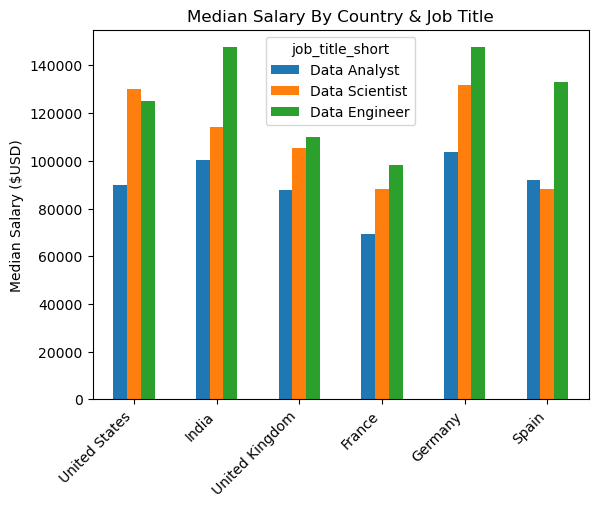

In [25]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary By Country & Job Title')
plt.xticks(rotation=45, ha='right')

# Save the plot to a file
plt.savefig('Median Salary By Country & Job Title.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()